# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [145]:
import pandas as pd

In [146]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [14]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [232]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [318]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

##### Проверка значений признаков на наличие опечаток и ошибок, исправление их (Приведение признаков к определенному типу при необходимости):

In [15]:
disc_feat = ['ID','age','absences']
real_feat = ['famrel','Dalc','Walc'] 
cat_feat = data.columns.drop(disc_feat).drop(real_feat).tolist()

# is appropriate type
for ser in disc_feat:
    for i, el in enumerate(data[ser]):
        if pd.isnull(el):
            continue
        if not isinstance(el, int):
            data[ser][i] = int(data[ser].median())
        
# from .. to ..
real_poss_val = [(1,5),(1,5),(1,5)]
for ser, rng in zip(real_feat, real_poss_val):
    for i, el in enumerate(data[ser]):
        if pd.isnull(el):
            continue
        if not isinstance(el, float) or not (rng[0] <= el <= rng[1]):
            data[ser][i] = float(data[ser].median())

# belongs to set
cat_poss_val = [['Math','Por'],['GP','MS'],['F','M'],
                ['U','R'],['LE3','GT3'],['T','A'],['1','2','3','4'],
               ['1','2','3','4'],['teacher','health','services','at_home','other'],
               ['teacher','health','services','at_home','other'],['home','reputation','course','other'],
               ['mother','father','other'],[1,2,3,4],[1,2,3,4],[0,1,2,3],['yes','no'],['yes','no'],['yes','no'],
               ['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],
               ['yes','no'],range(21),range(21),range(21)]

for ser, vls in zip(cat_feat, cat_poss_val):
    is_str = isinstance(vls[0], str)
    if is_str:
        dc = dict.fromkeys(vls, 0)
    for i, el in enumerate(data[ser]):
        if el not in vls:
            if pd.isnull(el):
                continue
            if is_str:
                max_val = max(dc.values())
                trend_feat = {x: y for x, y in dc.items() if y == max_val}
                data[ser][i] = list(trend_feat.keys())[0]
                continue
            else:
                data[ser][i] = int(data[ser].median())
                continue
        if is_str:
            dc[el] += 1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##### Обработка пропущенных значений:

In [16]:
for ser in disc_feat + real_feat:
    if data[ser].isnull().sum() != 0:
        if data[ser].dtype == 'int64':
            if data[ser].isnull().sum() / len(data[ser]) < 0.1:
                data[ser] = data[ser].fillna(data[ser].median()) # use meadian to avoid noise
            else:
                del disc_feat[disc_feat.index(ser)]
                data.drop(ser, axis='columns', inplace=True)
        else:
            if data[ser].isnull().sum() / len(data[ser]) < 0.1:
                data[ser] = data[ser].fillna(data[ser].mean()) # use mean beacause real values are limited
            else:
                del real_feat[real_feat.index(ser)]
                data.drop(ser, axis='columns', inplace=True)
            
for ser, vls in zip(cat_feat, cat_poss_val):
    is_str = isinstance(vls[0], str)
    if is_str:
        dc = dict.fromkeys(vls, 0)
    if data[ser].isnull().sum() != 0:
        if data[ser].isnull().sum() / len(data[ser]) < 0.6: # del column if nans more than 0.6
            for i, el in enumerate(data[ser]):   
                if pd.isnull(el):
                    if is_str:
                        max_val = max(dc.values())
                        trend_feat = {x: y for x, y in dc.items() if y == max_val}
                        data[ser][i] = list(trend_feat.keys())[0]
                        continue
                    else:
                        data[ser][i] = int(data[ser].median())
                        continue
                if is_str:
                    dc[el] += 1
        else:
            del cat_feat[cat_feat.index(ser)]
            data.drop(ser, axis='columns', inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##### Кодировка категориальных признаков:

In [17]:
def enc():
    from sklearn.preprocessing import LabelEncoder    # Coding categorial features
    le = LabelEncoder()
    for ser in cat_feat:
        if data[ser].dtype != 'int64':
            le.fit(data[ser])
            data[ser] = le.transform(data[ser])
    
enc()

In [18]:
data = data.drop(columns='ID')
del disc_feat[0]

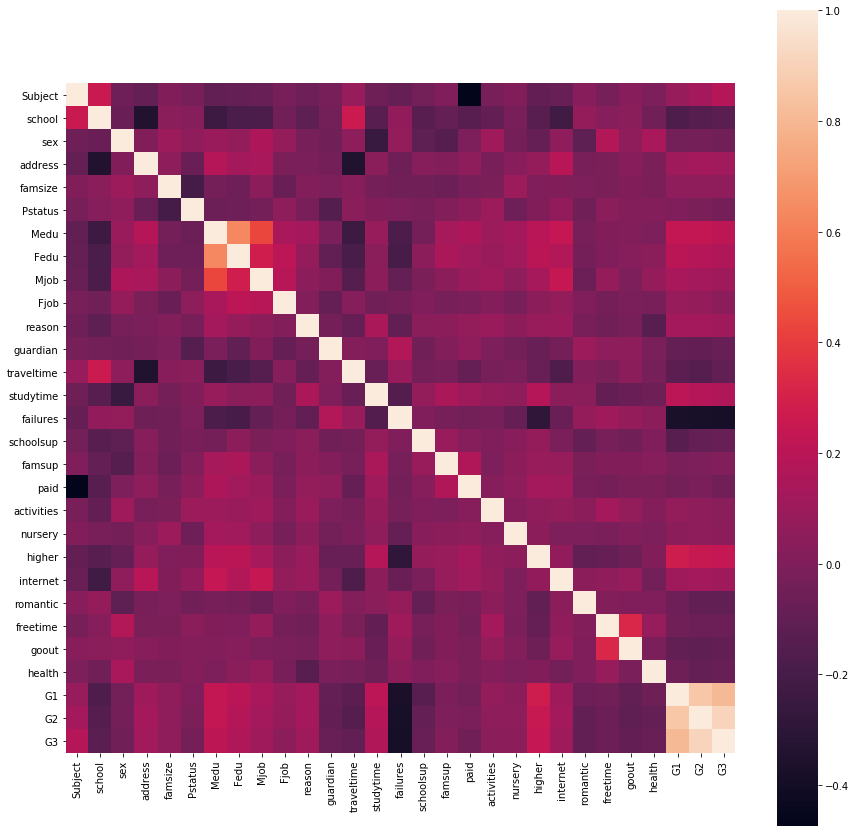

In [1021]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data[cat_feat].corr(), square=True)

In [19]:
corr = pd.DataFrame()
for b in list(data.columns.values):
    corr.loc['G3', b] = data.corr().loc['G3', b]
corr

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
G3,0.187166,-0.127114,-0.042021,-0.125282,0.117696,0.061209,-0.030693,0.211629,0.165529,0.11291,...,0.054794,-0.06489,-0.097877,-0.127128,-0.113781,-0.080079,-0.045671,0.809142,0.910743,1.0


##### Исключаем признаки, коэффициенты корреляции которых с итоговой оценкой близки к 0 (близки к значению коэффициента корреляции 'ID' с 'G3'):

In [20]:
data = data.drop(columns='famsup')  # ~0.013
del cat_feat[16]

##### Нормировка:

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [22]:
stand = pd.DataFrame(StandardScaler().fit_transform(data[disc_feat + real_feat]), columns=disc_feat + real_feat)
data = pd.concat([data.drop(columns=disc_feat + real_feat), stand], axis=1)

In [23]:
data_G1 = data.drop(columns=['G2'])
data_G1

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,G1,G3,age,absences,famrel,Dalc,Walc
0,1,0,0,1,0,0,2,3,3,2,...,2,1,5,15,14,-0.585820,1.218799,-1.008405,-0.546276,1.333950
1,1,0,0,1,0,1,2,1,2,2,...,3,4,3,17,17,0.221035,-0.392275,1.145915,-0.546276,0.553359
2,1,0,1,1,1,1,0,1,1,3,...,4,5,5,9,10,-0.585820,-0.714489,0.068755,1.651583,2.114541
3,1,1,1,1,0,1,1,2,2,3,...,4,3,3,14,16,0.221035,-0.070060,0.068755,-0.546276,-1.007823
4,1,0,0,1,0,1,0,0,0,2,...,3,2,5,12,13,-0.585820,-0.392275,0.068755,-0.546276,1.333950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,2,2,3,3,...,2,1,3,10,10,-1.392674,0.574369,0.068755,0.552653,0.553359
1040,1,0,1,0,0,1,1,0,1,3,...,4,2,5,10,10,-1.392674,-0.070060,1.145915,-0.546276,-1.007823
1041,1,1,0,0,1,1,0,0,0,2,...,3,2,1,16,18,-0.585820,-0.714489,1.145915,0.000000,-1.007823
1042,1,0,1,1,0,1,1,0,0,2,...,2,1,2,9,11,-0.585820,-0.070060,-1.008405,-0.546276,-1.007823


In [24]:
data = data.drop(columns=['G1', 'G2'])
data

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,freetime,goout,health,G3,age,absences,famrel,Dalc,Walc
0,1,0,0,1,0,0,2,3,3,2,...,0,2,1,5,14,-0.585820,1.218799,-1.008405,-0.546276,1.333950
1,1,0,0,1,0,1,2,1,2,2,...,0,3,4,3,17,0.221035,-0.392275,1.145915,-0.546276,0.553359
2,1,0,1,1,1,1,0,1,1,3,...,0,4,5,5,10,-0.585820,-0.714489,0.068755,1.651583,2.114541
3,1,1,1,1,0,1,1,2,2,3,...,0,4,3,3,16,0.221035,-0.070060,0.068755,-0.546276,-1.007823
4,1,0,0,1,0,1,0,0,0,2,...,0,3,2,5,13,-0.585820,-0.392275,0.068755,-0.546276,1.333950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,0,0,0,1,2,2,3,3,...,1,2,1,3,10,-1.392674,0.574369,0.068755,0.552653,0.553359
1040,1,0,1,0,0,1,1,0,1,3,...,1,4,2,5,10,-1.392674,-0.070060,1.145915,-0.546276,-1.007823
1041,1,1,0,0,1,1,0,0,0,2,...,0,3,2,1,18,-0.585820,-0.714489,1.145915,0.000000,-1.007823
1042,1,0,1,1,0,1,1,0,0,2,...,0,2,1,2,11,-0.585820,-0.070060,-1.008405,-0.546276,-1.007823


##### Общее представление (связь целевого признака с остальными):

In [1325]:
dict_corr = dict()
for feat in corr.columns:
    dict_corr[feat] = float(str(dict(corr)[feat])[6:-23-len(feat)])
del dict_corr['G1']
del dict_corr['G2']
list_corr = sorted(list(dict_corr.items()), key=lambda i: i[1], reverse=True)
most_corr = list(map(lambda a: a[0], list_corr[:6]))  # Наиболее коррелирующие с 'G3' признаки
most_corr

['G3', 'failures', 'higher', 'Medu', 'Subject', 'Fedu']

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/dis

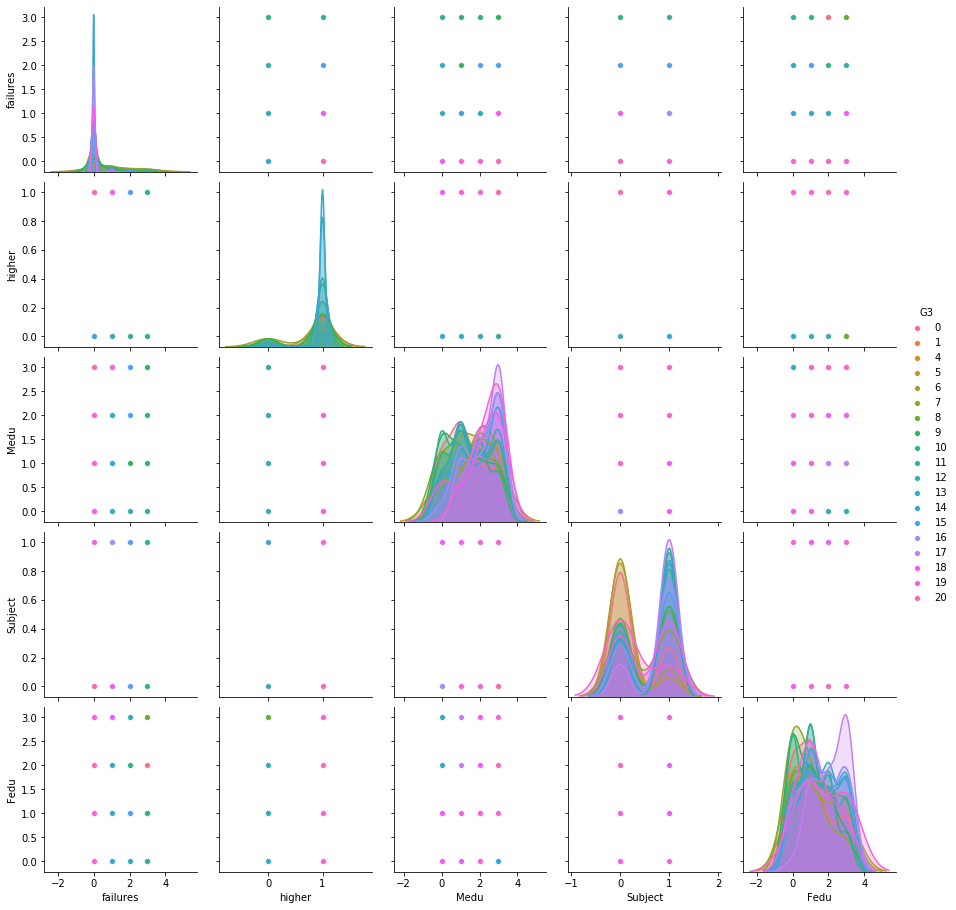

In [804]:
sns.pairplot(data[most_corr], hue="G3", diag_kind="kde")

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [30]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import numpy as np

### С использованием G1:

In [806]:
y_data = data_G1['G3']
X_data = data_G1.drop(columns=['G3'])
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)

In [807]:
n_alphas = 200
reg_alphas = np.logspace(-2, 6, n_alphas)

######  Гребневая регрессия

In [808]:
ridge_cv = RidgeCV(alphas=reg_alphas, cv=4, scoring='r2').fit(X_data, y_data)
ridge_reg = Ridge(alpha=ridge_cv.alpha_)

In [809]:
score = cross_val_score(ridge_reg, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации гребневой регрессии (с G1):', round(np.mean(score), 2))

Коэффициент детерминации гребневой регрессии (с G1): 0.66


######  Лассо регрессия

In [810]:
lasso_cv = LassoCV(alphas=reg_alphas, cv=4).fit(X_data, y_data)
lasso_reg = Lasso(alpha=lasso_cv.alpha_)

In [811]:
score = cross_val_score(lasso_reg, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации лассо регрессии (с G1):', round(np.mean(score), 2))

Коэффициент детерминации лассо регрессии (с G1): 0.67


######  Полиномиальная регрессия

In [812]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
grid_poly = GridSearchCV(poly_model, {'ridge__alpha': reg_alphas}, scoring='neg_mean_absolute_error', cv=4).fit(X_data, y_data)

In [813]:
X_data_poly = PolynomialFeatures(degree=2).fit_transform(X_data)
poly_model = grid_poly.best_estimator_
score = cross_val_score(poly_model, X_data_poly, y_data, cv=3, n_jobs=1, scoring='neg_mean_absolute_error')
print('Средняя абсолютная ошибка полиномиальной регрессии (с G1):', round(np.mean(score), 2))

Средняя абсолютная ошибка полиномиальной регрессии (с G1): -2.2


######  KNN

In [814]:
grid_knn = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': range(2, 15)}, scoring='r2', cv=4).fit(X_data, y_data)
knn_model = grid_knn.best_estimator_
score = cross_val_score(knn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации knn (с G1):', round(np.mean(score), 2))

Коэффициент детерминации knn (с G1): 0.62


######  Radius Neighbors

In [815]:
grid_rn = GridSearchCV(RadiusNeighborsRegressor(), {'radius': np.linspace(1, 30, 100)}, scoring='neg_mean_absolute_error', cv=4).fit(X_data, y_data)
rn_model = grid_rn.best_estimator_
score = cross_val_score(rn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='neg_mean_absolute_error')
print('Коэффициент детерминации radius neighbors (с G1):', round(np.mean(score), 2))

Коэффициент детерминации radius neighbors (с G1): -8834647544880054.0


######  Деревья решений

In [816]:
grid_dtc = GridSearchCV(DecisionTreeRegressor(), {'max_depth': range(1, 40)}, scoring='r2', cv=4).fit(X_data, y_data)
dtc_model = grid_dtc.best_estimator_.fit(X_data, y_data)
score = cross_val_score(dtc_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации decision tree regressor (с G1):', round(np.mean(score), 2))

Коэффициент детерминации decision tree regressor (с G1): 0.67


### Без использования G1:

In [32]:
y_data = data_G1['G3']
X_data = data_G1.drop(columns=['G3', 'G1'])
k_fold = KFold(n_splits=4, shuffle=True, random_state=0)

In [819]:
n_alphas = 200
reg_alphas = np.logspace(-2, 6, n_alphas)

######  Гребневая регрессия

In [820]:
ridge_cv = RidgeCV(alphas=reg_alphas, cv=4, scoring='r2').fit(X_data, y_data)
ridge_reg = Ridge(alpha=ridge_cv.alpha_)

In [821]:
score = cross_val_score(ridge_reg, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации гребневой регрессии (без G1):', round(np.mean(score), 2))

Коэффициент детерминации гребневой регрессии (без G1): 0.2


######  Лассо регрессия

In [822]:
lasso_cv = LassoCV(alphas=reg_alphas, cv=4).fit(X_data, y_data)
lasso_reg = Lasso(alpha=lasso_cv.alpha_)

In [823]:
score = cross_val_score(lasso_reg, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации лассо регрессии (без G1):', round(np.mean(score), 2))

Коэффициент детерминации лассо регрессии (без G1): 0.21


######  Полиномиальная регрессия

In [824]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
grid_poly = GridSearchCV(poly_model, {'ridge__alpha': reg_alphas}, scoring='neg_mean_absolute_error', cv=4).fit(X_data, y_data)

In [825]:
X_data_poly = PolynomialFeatures(degree=2).fit_transform(X_data)
poly_model = grid_poly.best_estimator_
score = cross_val_score(poly_model, X_data_poly, y_data, cv=3, n_jobs=1, scoring='neg_mean_absolute_error')
print('Средняя абсолютная ошибка полиномиальной регрессии (без G1):', round(np.mean(score), 2))

Средняя абсолютная ошибка полиномиальной регрессии (без G1): -3.65


######  KNN

In [826]:
grid_knn = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': range(2, 15)}, scoring='r2', cv=4).fit(X_data, y_data)
knn_model = grid_knn.best_estimator_
score = cross_val_score(knn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации knn (без G1):', round(np.mean(score), 2))

Коэффициент детерминации knn (без G1): 0.11


######  Radius Neighbors

In [827]:
grid_rn = GridSearchCV(RadiusNeighborsRegressor(), {'radius': np.linspace(1, 20, 100)}, scoring='r2', cv=4).fit(X_data, y_data)
rn_model = grid_rn.best_estimator_
score = cross_val_score(rn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации radius neighbors (без G1):', round(np.mean(score), 2))

Коэффициент детерминации radius neighbors (без G1): -5.265887350536191e+33


######  Деревья решений

In [829]:
grid_dtc = GridSearchCV(DecisionTreeRegressor(), {'max_depth': range(1, 40)}, scoring='r2', cv=4).fit(X_data, y_data)
dtc_model = grid_dtc.best_estimator_.fit(X_data, y_data)
score = cross_val_score(dtc_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='r2')
print('Коэффициент детерминации decision tree regressor (без G1):', round(np.mean(score), 2))

Коэффициент детерминации decision tree regressor (без G1): 0.2


### Вывод:
Очевидно, что с параметром 'G1' модели работают гораздо эффективнее (значение коэффициента корреляции 'G1' и 'G3' наивысшее после после 'G3' самого с собой, разумеется), касаемо самой точной модели в данной ситуации, то ей становится лассо регрессия. Модели полиномиальной регрессии (была выбрана метрика средней абсолютной ошибки для разнообразия) и Radius Neighbors показали результаты хуже остальных.

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


In [25]:
data_bin = data.copy(deep=True)
data_bin.loc[data['G3'] < 8, 'G3'] = 0
data_bin.loc[data['G3'] >= 8, 'G3'] = 1

In [26]:
y_data = data_bin['G3']
X_data = data_bin.drop(columns=['G3'])

In [27]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

######  KNN

In [1120]:
grid_knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(2, 15)}, scoring='accuracy', cv=4).fit(X_data, y_data)
knn_model = grid_knn.best_estimator_
score = cross_val_score(knn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность knn classifier:', round(np.mean(score), 2))

Точность knn classifier: 0.91


In [1121]:
y_pred_test = knn_model.predict(X_test)
y_probs_test = knn_model.predict_proba(X_test)[:, 1]

In [1122]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[  5,  20],
       [  0, 289]])

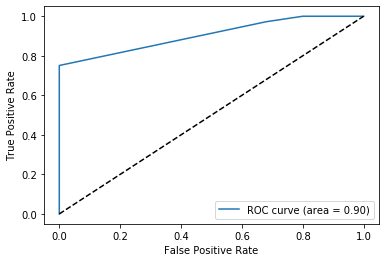

In [1124]:
auc = roc_auc_score(y_test, y_probs_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

######  Radius Neighbors

In [1125]:
grid_rn = GridSearchCV(RadiusNeighborsClassifier(), {'radius': np.linspace(10, 200, 100)}, scoring='accuracy', cv=4).fit(X_data, y_data)
rn_model = grid_rn.best_estimator_
score = cross_val_score(rn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность radius neighbors classifier:', round(np.mean(score), 2))

Точность radius neighbors classifier: 0.9


In [1126]:
y_pred_test = rn_model.predict(X_test)
y_probs_test = rn_model.predict_proba(X_test)[:, 1]

In [1127]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[  0,  25],
       [  0, 289]])

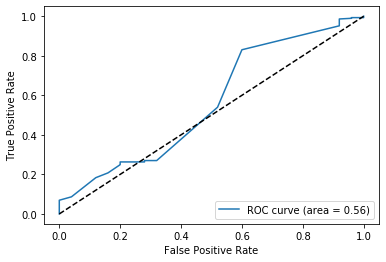

In [1128]:
auc = roc_auc_score(y_test, y_probs_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

######  Логистическая регрессия

In [37]:
grid_logr = GridSearchCV(LogisticRegression(class_weight='balanced'), {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}, scoring='accuracy', cv=4).fit(X_data, y_data)
logr_model = grid_logr.best_estimator_
score = cross_val_score(logr_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность логистической регрессии:', round(np.mean(score), 2))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Точность логистической регрессии: 0.12


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
y_pred_test = logr_model.predict(X_test)
y_probs_test = logr_model.predict_proba(X_test)[:, 1]

In [40]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[13,  0,  1,  1,  9,  4,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  2],
       [13,  0,  0,  5, 24, 11, 17, 14, 12, 22, 17, 21, 13, 19, 17, 38,
        20, 18],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

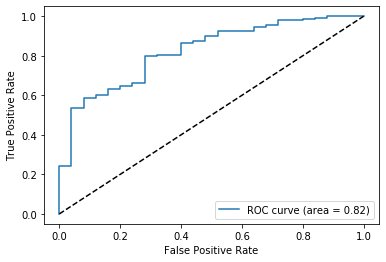

In [1132]:
auc = roc_auc_score(y_test, y_probs_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

######  Деревья решений 

In [33]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1, 40)}, scoring='accuracy', cv=4).fit(X_data, y_data)
dtc_model = grid_dtc.best_estimator_.fit(X_data, y_data)
score = cross_val_score(dtc_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность decision tree classifier:', round(np.mean(score), 2))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


Точность decision tree classifier: 0.15


In [ ]:
y_pred_test = dtc_model.predict(X_test)
y_probs_test = dtc_model.predict_proba(X_test)[:, 1]

In [1284]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[  0,  44],
       [  0, 270]])

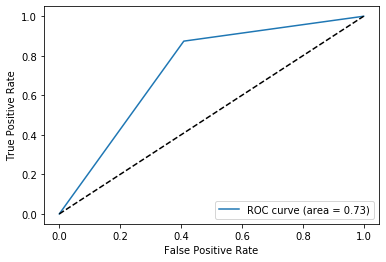

In [1285]:
auc = roc_auc_score(y_test, y_probs_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [41]:
score_5_depth = cross_val_score(DecisionTreeClassifier(max_depth=5), X_data, y_data, cv=5, n_jobs=1, scoring='accuracy')
print('Точность decision tree classifier глубиной 5, на кросс-валидации с 5ью фолдами:', round(np.mean(score), 2))

Точность decision tree classifier глубиной 5, на кросс-валидации с 5ью фолдами: 0.12


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [42]:
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(X_data[['Dalc', 'age']], y_data, test_size=0.3)

In [43]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [44]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, colors, light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [45]:
import sklearn
import graphviz

In [1334]:
from matplotlib.colors import ListedColormap
from sklearn import metrics

Depth = 3:

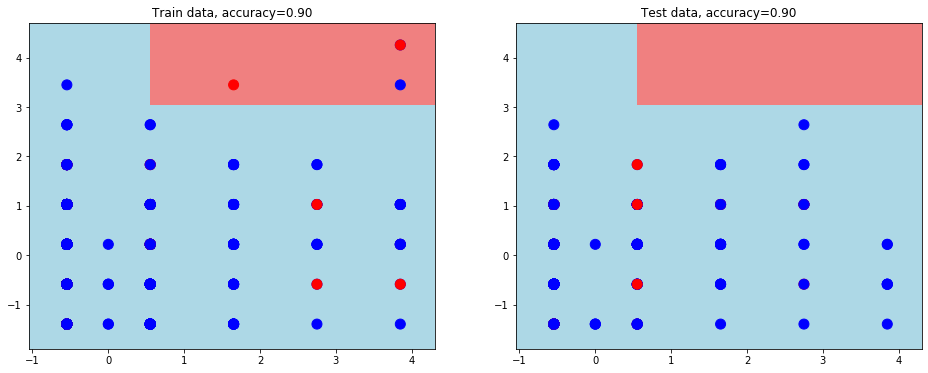

In [1335]:
plot_decision_surface(DecisionTreeClassifier(random_state = 1, max_depth = 3), np.array(X_train_dtc), np.array(y_train_dtc), np.array(X_test_dtc), np.array(y_test_dtc), ListedColormap(['red', 'blue']), ListedColormap(['lightcoral', 'lightblue']))

Depth = 4:

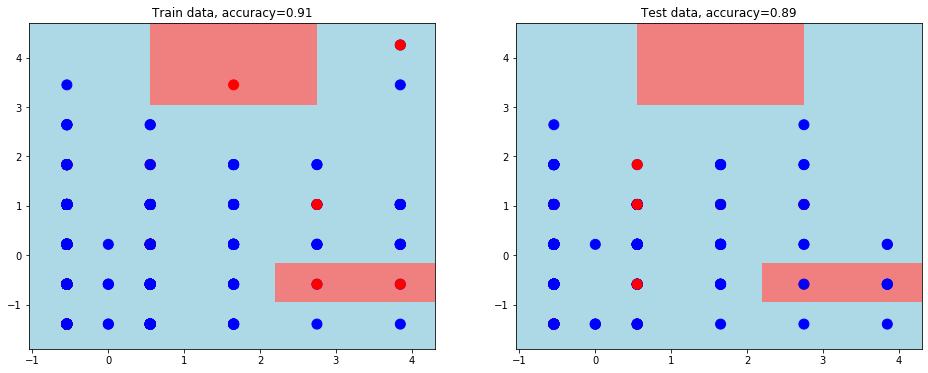

In [1336]:
plot_decision_surface(DecisionTreeClassifier(random_state = 1, max_depth = 4), np.array(X_train_dtc), np.array(y_train_dtc), np.array(X_test_dtc), np.array(y_test_dtc), ListedColormap(['red', 'blue']), ListedColormap(['lightcoral', 'lightblue']))

Depth = 5:

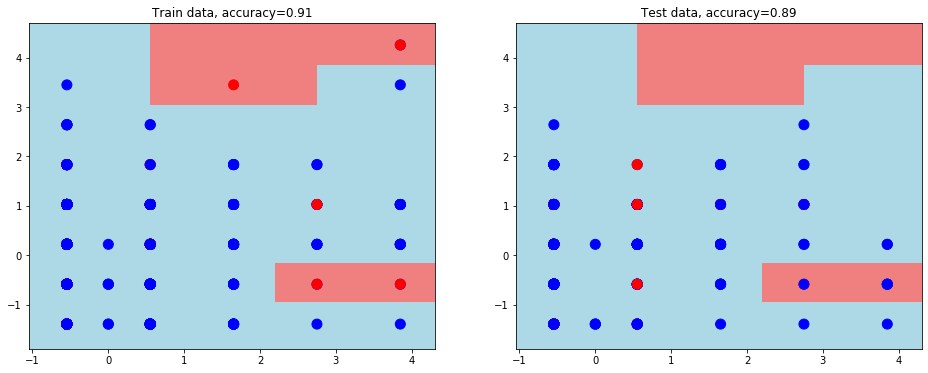

In [1337]:
plot_decision_surface(DecisionTreeClassifier(random_state = 1, max_depth = 5), np.array(X_train_dtc), np.array(y_train_dtc), np.array(X_test_dtc), np.array(y_test_dtc), ListedColormap(['red', 'blue']), ListedColormap(['lightcoral', 'lightblue']))

Depth = 6:

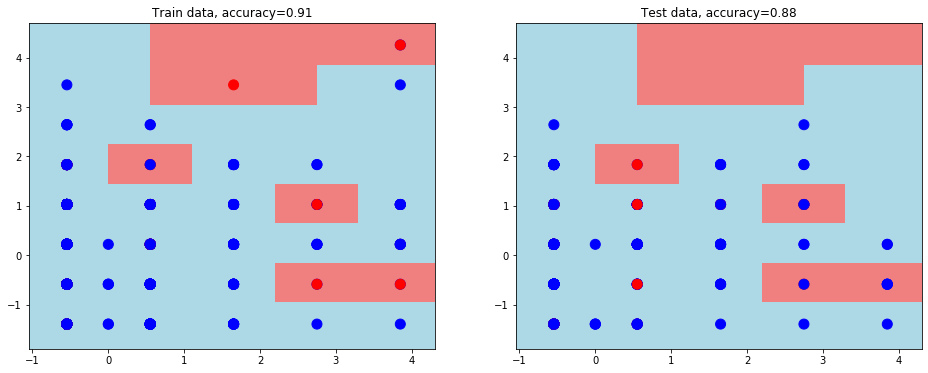

In [1339]:
plot_decision_surface(DecisionTreeClassifier(random_state = 1, max_depth = 6), np.array(X_train_dtc), np.array(y_train_dtc), np.array(X_test_dtc), np.array(y_test_dtc), ListedColormap(['red', 'blue']), ListedColormap(['lightcoral', 'lightblue']))

######  Random Forest (доп)

In [1133]:
grid_rnd = GridSearchCV(RandomForestClassifier(), {'n_estimators': range(50, 150)}, scoring='accuracy', cv=4).fit(X_data, y_data)
rnd_model = grid_rnd.best_estimator_
score = cross_val_score(rnd_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность случайного леса:', round(np.mean(score), 2))

Точность случайного леса: 0.9


In [1134]:
y_pred_test = rnd_model.predict(X_test)
y_probs_test = rnd_model.predict_proba(X_test)[:, 1]

In [1135]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[ 25,   0],
       [  0, 289]])

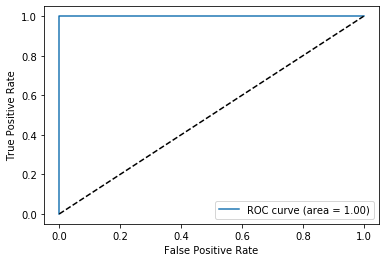

In [1136]:
auc = roc_auc_score(y_test, y_probs_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Вывод:
За основу оценивания была выбрана метрика 'accuracy', так как является наиболее подходящей для категориальных признаков, самыми надежной моделью для предсказания результатов экзамена (сдаст или нет) стала KNN, самый низкий результат был представлен логистической регрессиеий, но в целом все модели показали себя достаточно неплохо.

### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

In [1201]:
data_multi = data.copy(deep=True)
data_multi.loc[data['G3'] < 8, 'G3'] = 0
data_multi.loc[(8 <= data['G3']) & (data['G3'] <= 13), 'G3'] = 1
data_multi.loc[(14 <= data['G3']) & (data['G3'] <= 17), 'G3'] = 2
data_multi.loc[(18 <= data['G3']) & (data['G3'] <= 20), 'G3'] = 3

In [1202]:
y_data = data_multi['G3']
X_data = data_multi.drop(columns=['G3'])

In [1203]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [1213]:
y_data_lb = label_binarize(y_data, classes=[0,1,2,3])
n_classes = 4
X_train_lb, X_test_lb, y_train_lb, y_test_lb = train_test_split(X_data, y_data_lb, test_size=0.3, random_state=0)

###### KNN

In [1214]:
grid_knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(2, 15)}, scoring='accuracy', cv=4).fit(X_data, y_data)
knn_model = grid_knn.best_estimator_
score = cross_val_score(knn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность knn classifier (multi):', round(np.mean(score), 2))

Точность knn classifier (multi): 0.64


In [1215]:
y_pred_test = knn_model.predict(X_test)
y_probs_test = knn_model.predict_proba(X_test)[:, 1]

In [1216]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[  1,  25,   7,   0],
       [  2, 170,  24,   0],
       [  0,  39,  35,   0],
       [  0,   7,   4,   0]])

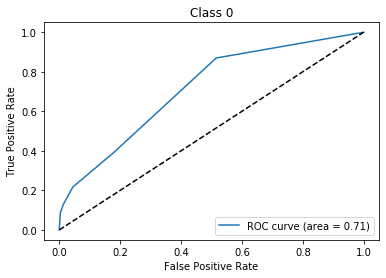

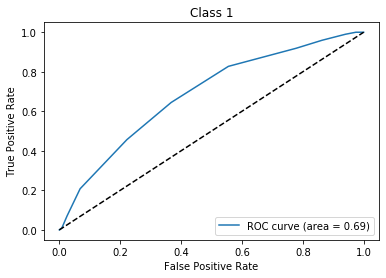

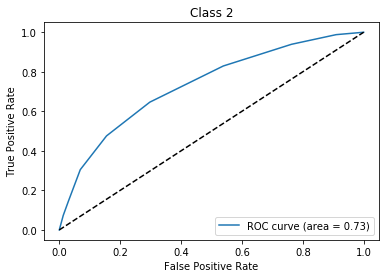

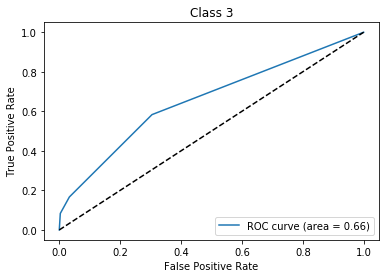

In [1225]:
# classifier
clf = OneVsRestClassifier(knn_model)
y_score = clf.fit(X_train_lb, y_train_lb).predict_proba(X_test_lb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Class {}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

###### Radius Neighbors

In [1218]:
grid_rn = GridSearchCV(RadiusNeighborsClassifier(), {'radius': np.linspace(10, 200, 100)}, scoring='accuracy', cv=4).fit(X_data, y_data)
rn_model = grid_rn.best_estimator_
score = cross_val_score(rn_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность radius neighbors classifier:', round(np.mean(score), 2))

Точность radius neighbors classifier: 0.62


In [1219]:
y_pred_test = rn_model.predict(X_test)
y_probs_test = rn_model.predict_proba(X_test)[:, 1]

In [1220]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[  0,  33,   0,   0],
       [  0, 196,   0,   0],
       [  0,  74,   0,   0],
       [  0,  11,   0,   0]])

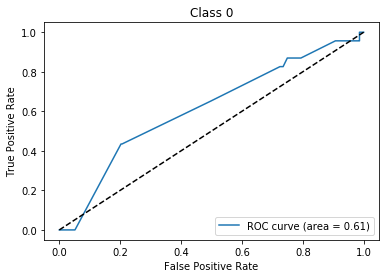

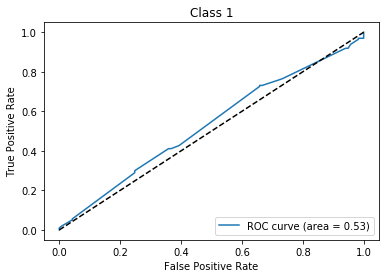

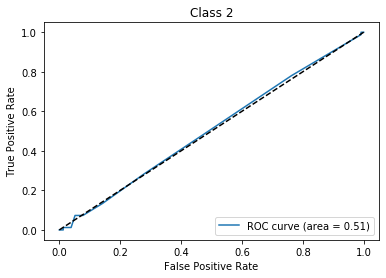

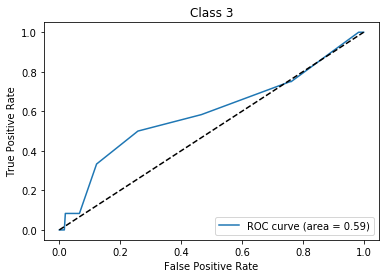

In [1226]:
# classifier
clf = OneVsRestClassifier(rn_model)
y_score = clf.fit(X_train_lb, y_train_lb).predict_proba(X_test_lb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Class {}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

######  Логистическая регрессия

In [1240]:
grid_logr = GridSearchCV(LogisticRegression(class_weight='balanced'), {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}, scoring='accuracy', cv=4).fit(X_data, y_data)
logr_model = grid_logr.best_estimator_
score = cross_val_score(logr_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность логистической регрессии:', round(np.mean(score), 2))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Точность логистической регрессии: 0.44


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1241]:
y_pred_test = logr_model.predict(X_test)
y_probs_test = logr_model.predict_proba(X_test)[:, 1]

In [1242]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[21,  4,  4,  4],
       [41, 81, 46, 28],
       [ 5, 16, 28, 25],
       [ 1,  1,  1,  8]])

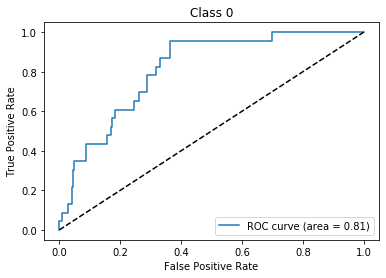

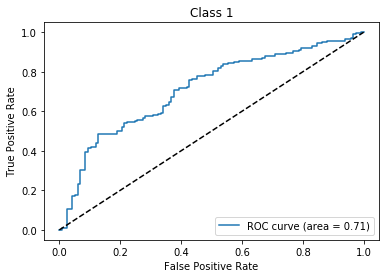

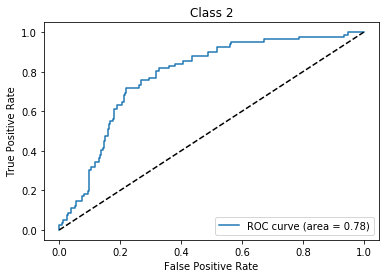

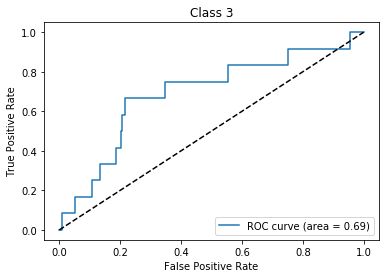

In [1243]:
# classifier
clf = OneVsRestClassifier(logr_model)
y_score = clf.fit(X_train_lb, y_train_lb).predict_proba(X_test_lb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Class {}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

######  Деревья решений 

In [1268]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1, 40)}, scoring='accuracy', cv=4).fit(X_data, y_data)
dtc_model = grid_dtc.best_estimator_.fit(X_data, y_data)
score = cross_val_score(dtc_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность decision tree classifier:', round(np.mean(score), 2))

Точность decision tree classifier: 0.63


In [1269]:
y_pred_test = rn_model.predict(X_test)
y_probs_test = rn_model.predict_proba(X_test)[:, 1]

In [ ]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

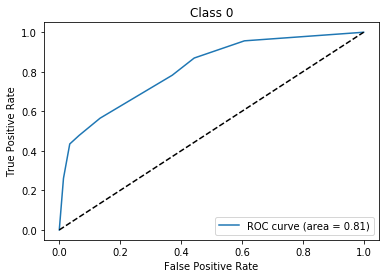

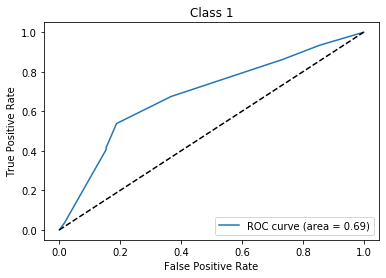

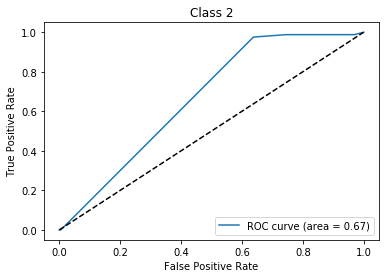

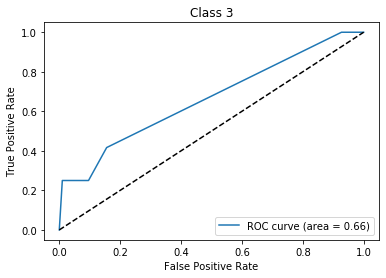

In [1270]:
# classifier
clf = OneVsRestClassifier(dtc_model)
y_score = clf.fit(X_train_lb, y_train_lb).predict_proba(X_test_lb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Class {}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [1267]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(), {'max_depth': range(1, 10)}, scoring='accuracy', cv=4).fit(X_data, y_data)
grid_dtc.cv_results_['mean_test_score']

array([0.62260536, 0.62835249, 0.63409962, 0.62068966, 0.62643678,
       0.61590038, 0.61590038, 0.59003831, 0.58333333])

Видно, что до определенного показателя глубины (3) точность модели растет, после этой точки точность падает (переобучение модели).

######  Random Forest (доп)

In [1244]:
grid_rnd = GridSearchCV(RandomForestClassifier(), {'n_estimators': range(50, 150)}, scoring='accuracy', cv=4).fit(X_data, y_data)
rnd_model = grid_rnd.best_estimator_
score = cross_val_score(rnd_model, X_data, y_data, cv=k_fold, n_jobs=1, scoring='accuracy')
print('Точность случайного леса:', round(np.mean(score), 2))

Точность случайного леса: 0.68


In [1245]:
y_pred_test = rnd_model.predict(X_test)
y_probs_test = rnd_model.predict_proba(X_test)[:, 1]

In [1246]:
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_test)

Confusion matrix:


array([[ 33,   0,   0,   0],
       [  0, 196,   0,   0],
       [  0,   0,  74,   0],
       [  0,   0,   0,  11]])

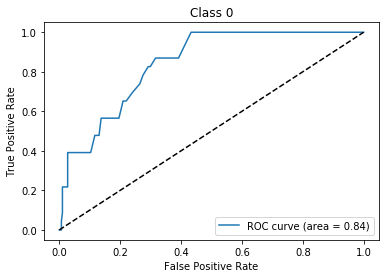

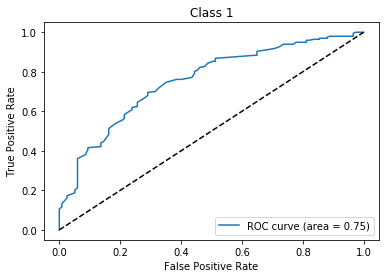

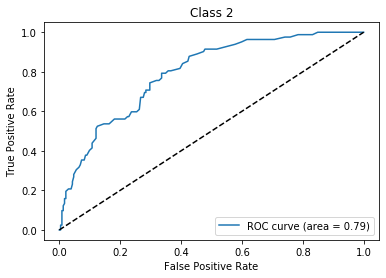

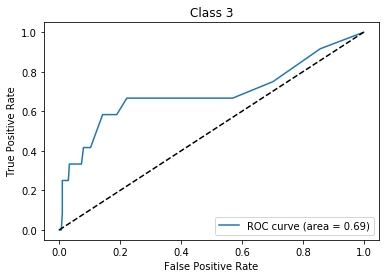

In [1248]:
# classifier
clf = OneVsRestClassifier(rnd_model)
y_score = clf.fit(X_train_lb, y_train_lb).predict_proba(X_test_lb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_lb[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Class {}'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

### Вывод:
Рультаты исследования эффективности мультиклассовых классификаций несильно отличаются от результатов бинарных, однако общая точность немного снизилась (особенно лог регрессии), и теперь самый лучший результат показал метод Random Forest Classifier, метрики, используемые для сравнения не изменились. В целом, результаты можно оценить как удовлетворительный.

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.